In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
mnist_train = pd.read_csv ("datasets/mnist_train.csv")
X_train = np.array (mnist_train.values [:, 1:])
y_train = np.array (mnist_train.values [:, 0])

mnist_test = pd.read_csv ("datasets/mnist_test.csv")
X_test = np.array (mnist_test.values [:, 1:])
y_test = np.array (mnist_test.values [:, 0])

In [171]:
Y_train, Y_test = np.zeros((y_train.shape[0], 10)), np.zeros((y_test.shape[0], 10))
for i in range(len(y_train)):
    Y_train [i, y_train[i]] = 1;

for k in range(len(y_test)):
    Y_test[k, y_test[k]] = 1;

In [172]:
#printing the shape of the datasets
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T
print ("Train set: X: ", X_train.shape, "  Y: ", Y_train.shape)
print ("Test set: X: ", X_test.shape, "  Y: ", Y_test.shape)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

Train set: X:  (784, 60000)   Y:  (10, 60000)
Test set: X:  (784, 10000)   Y:  (10, 10000)


In [173]:
np.random.seed (1)

In [245]:
#initializing the model parameters
def initialize_params (shape):
    
    parameters = {}
    
    for i in range (0, len (shape) - 1):
        
        w = np.random.rand (shape [i+1], shape [i])/np.sqrt (784)
        b = np.zeros ((shape [i+1],1))
        
        parameters ['W' + str (i+1)] = w
        parameters ['b' + str (i+1)] = b
    
    return parameters

In [246]:
def forward_prop (X, W, b):
    
    z = np.dot (W, X) + b
    a = softmax (z)
    return a

In [247]:
def softmax(x):
    x = np.exp (x)
    return x/np.sum (x, axis = 0, keepdims = True)

In [248]:
def compute_cost (Y, a):
    
    m = Y.shape[1]
    
    cost = (-1/m) * np.sum (Y * np.log (a))
    
    return cost

In [249]:
def backprop(X, Y, A):
    m = Y.shape[1]
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    return dw, db

In [250]:
def train (X, Y, parameters, l_rate, iterations):
    cost = []
    for i in range(iterations):
        a = forward_prop (X, parameters ['W1'], parameters ['b1'])
        
        c = compute_cost(Y, a)
        dw, db = backprop(X, Y, a)

        parameters ['W1'] = parameters['W1'] - l_rate * dw.T
        parameters ['b1'] = parameters['b1'] - l_rate * db.T

        if i % 100 == 0:
            print("Iteration: {}, Loss: {}".format (i, c))
        
        cost.append(c)
    return parameters, cost

In [251]:
def model (X, Y, iters, l_rate, shape):
    parameters = initialize_params (shape)
    parameters, cost = train (X, Y, parameters, l_rate, iters)
    return parameters, cost

In [253]:

parameters, cost = model (X_train, Y_train, 1500, 0.01, [X_train.shape [0], 10])

Iteration: 0, Loss: 2.306000672674162
Iteration: 100, Loss: 1.557384408067806
Iteration: 200, Loss: 1.1962874031268547
Iteration: 300, Loss: 1.0015499354318886
Iteration: 400, Loss: 0.8822355740636966
Iteration: 500, Loss: 0.8017073216434127
Iteration: 600, Loss: 0.743484734502744
Iteration: 700, Loss: 0.6992367869405104
Iteration: 800, Loss: 0.6643313528106252
Iteration: 900, Loss: 0.6359923728917812
Iteration: 1000, Loss: 0.6124543995669444
Iteration: 1100, Loss: 0.5925398857648523
Iteration: 1200, Loss: 0.5754322714229313
Iteration: 1300, Loss: 0.560546777793404
Iteration: 1400, Loss: 0.5474531162847799


In [254]:
def accuracy (X, Y, parameters):
    a = forward_prop (X, parameters ['W1'], parameters ['b1'])
    a = np.argmax (a, axis=0)
    Y = np.argmax (Y, axis=0)
    acc = (a == Y).mean ()

    return acc * 100

In [257]:
accuracy (X_test, Y_test, parameters)

87.94

In [258]:
accuracy (X_train, Y_train, parameters)

86.95666666666668

In [259]:
print (parameters['W1'].shape, parameters['b1'].shape)

(10, 784) (10, 1)


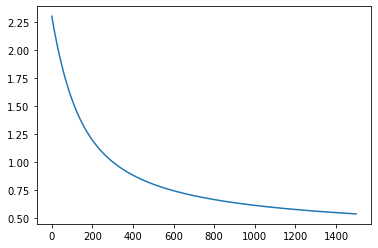

In [260]:
plt.plot(range(len(cost)),cost)

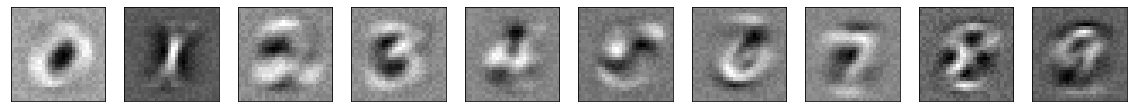

In [262]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(10):
    plt.gray
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(parameters['W1'][i,:].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()